# ANALYZE SALE PERFORMANCE

## Import necessary libraries

In [113]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt

## Combine all datasets into a single file

In [114]:
df = pd.DataFrame()
files = [file for file in os.listdir('./Datasets')]
for file in files:
    month_df = pd.read_csv('./Datasets/'+file)
    df = pd.concat([df,month_df], axis=0, ignore_index=True)
    
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Preprocess data
After concatenated all data files to a single dataframe. Next, we will start analyzing the sale performance.<br>
The first question we have in mind is that how much performance of sale in each month?</br>
To do that analysis, firstly, we need to base on the column "Order date". But we can easily see that, this column contains date data in MM/DD/YYYY HH24:MI format. So what we need to do is to extract month value from this column.</br>
Solution: Create a new column "Month" based on data from "Order date".</br>

### !Caution! <br>
Before creating new columns we have to ensure that the dataset must be clean.<br>
In this case, we face off 2 problems come from this dataset. NULL(NaN) value and some rows contain columns name instead of value.<br>
So we have to clean them all before continue the process.<br>

In [116]:
df = df.dropna(how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [117]:
df = df[df["Order Date"] != 'Order Date']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


After dropping all NaN and incorrect data rows. We continue with the analysis.<br>

In [118]:
df["Month"] = pd.to_datetime(df['Order Date']).dt.month.astype('int32')

In [119]:
df['Month'].value_counts()

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: int64

In [120]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


We can see that the column **"Month"** has been created correctly.<br>
To analyze sale performance in each month, one more value we need to focus on is that how much the revenue is.<br>
To get this value we will multiply values in columns **"Quantity Ordered"** and **"Price Each"**.<br>
### !Caution!</br>
Before applying multiply for the 2 columns, we need to convert their data type to be number.<br>

In [121]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [122]:
df["Revenue"] = df["Quantity Ordered"] * df["Price Each"]

In [123]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


# EDA
### Which month has the highest revenue?

In [124]:
df.groupby("Month")["Revenue"].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Revenue, dtype: float64

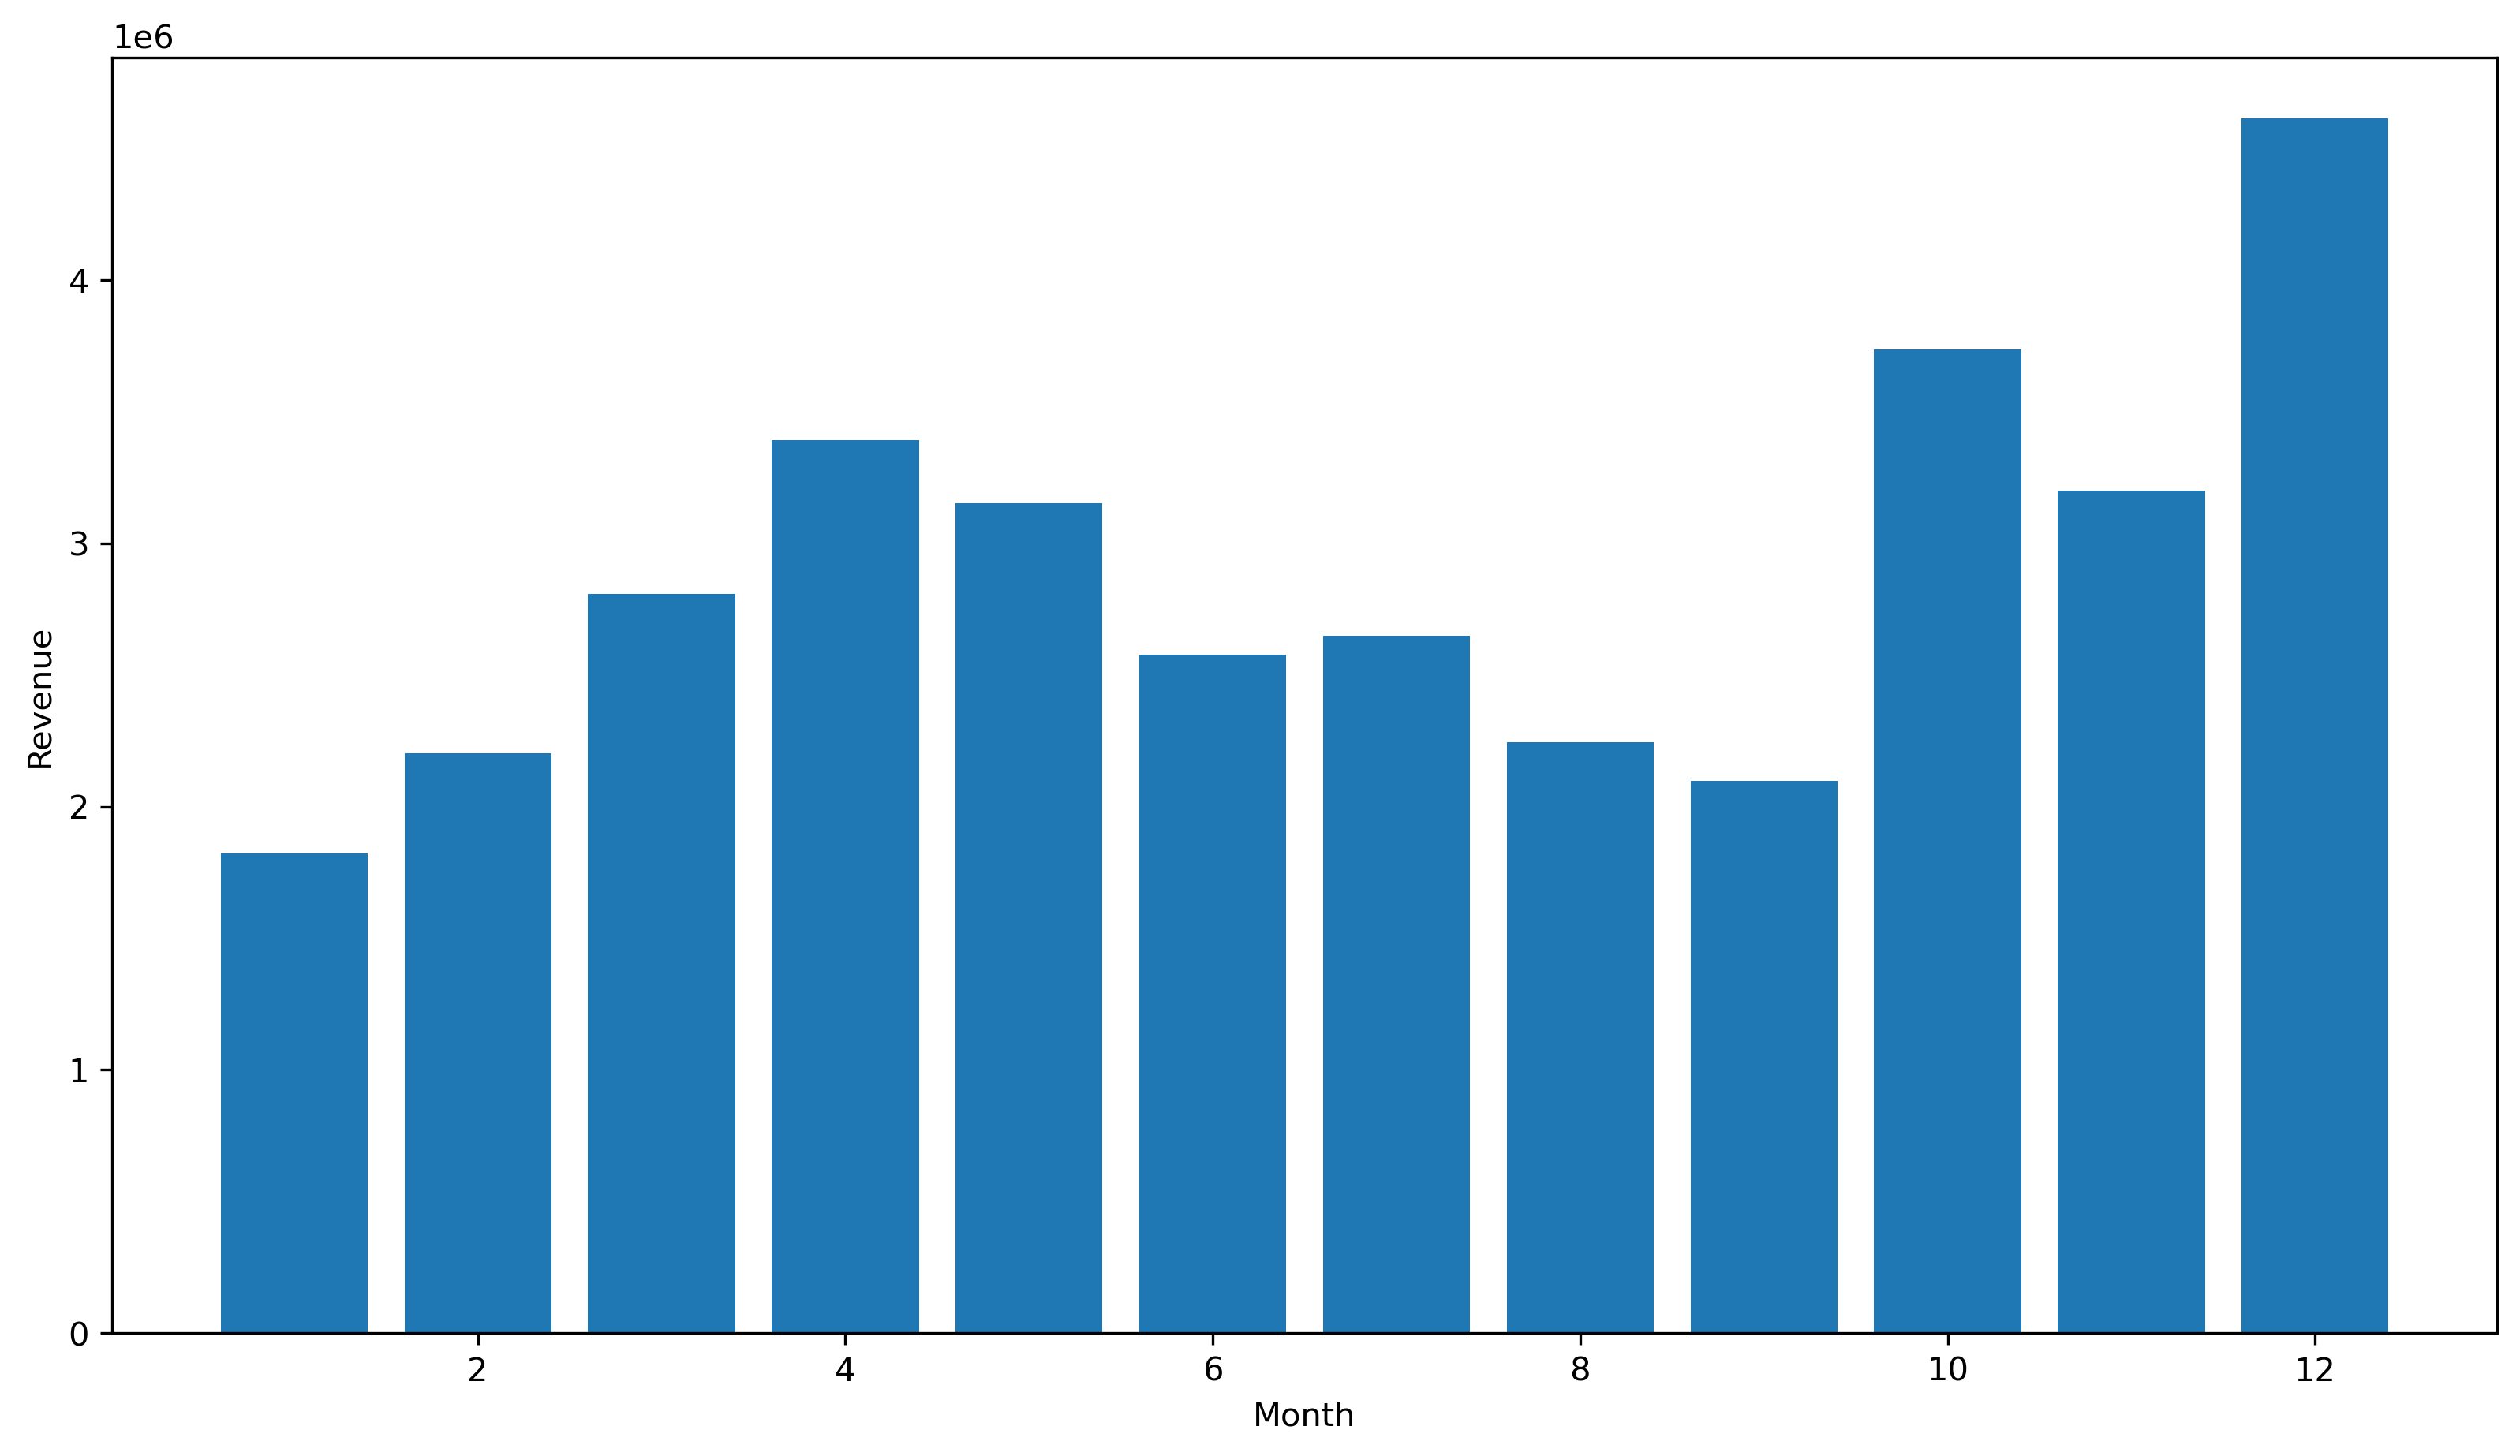

In [125]:
months = range(1,13)
result = df.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(13, 7), dpi=300)
plt.bar(months, result)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

We can see that the revenue in December is the highest one. It could be due to people tend to spend their money for vacations in the end of year, ex: X-Mas.</br>
We can also see that the revenue of the 3 last months of year is higher than the others, we can assump that in the end of each year, we have more vacations, sale-off events, or people saving money for the whole year to spend it in the end,...it might be clues to plan some sale strategies in this period.</br>
But to ensure that our sale strategy will get high successful rate, or to understand deeper buy activity from customers, we need to explore in more details.</br>

### Which city has the highest revenue?
To determine which city for each sale, we have to base on column **"Purchase Address"**

In [126]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return (address.split(',')[2]).split()[0]

df["City"] = df["Purchase Address"].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [127]:
df.groupby("City")["Revenue"].sum()

City
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Revenue, dtype: float64

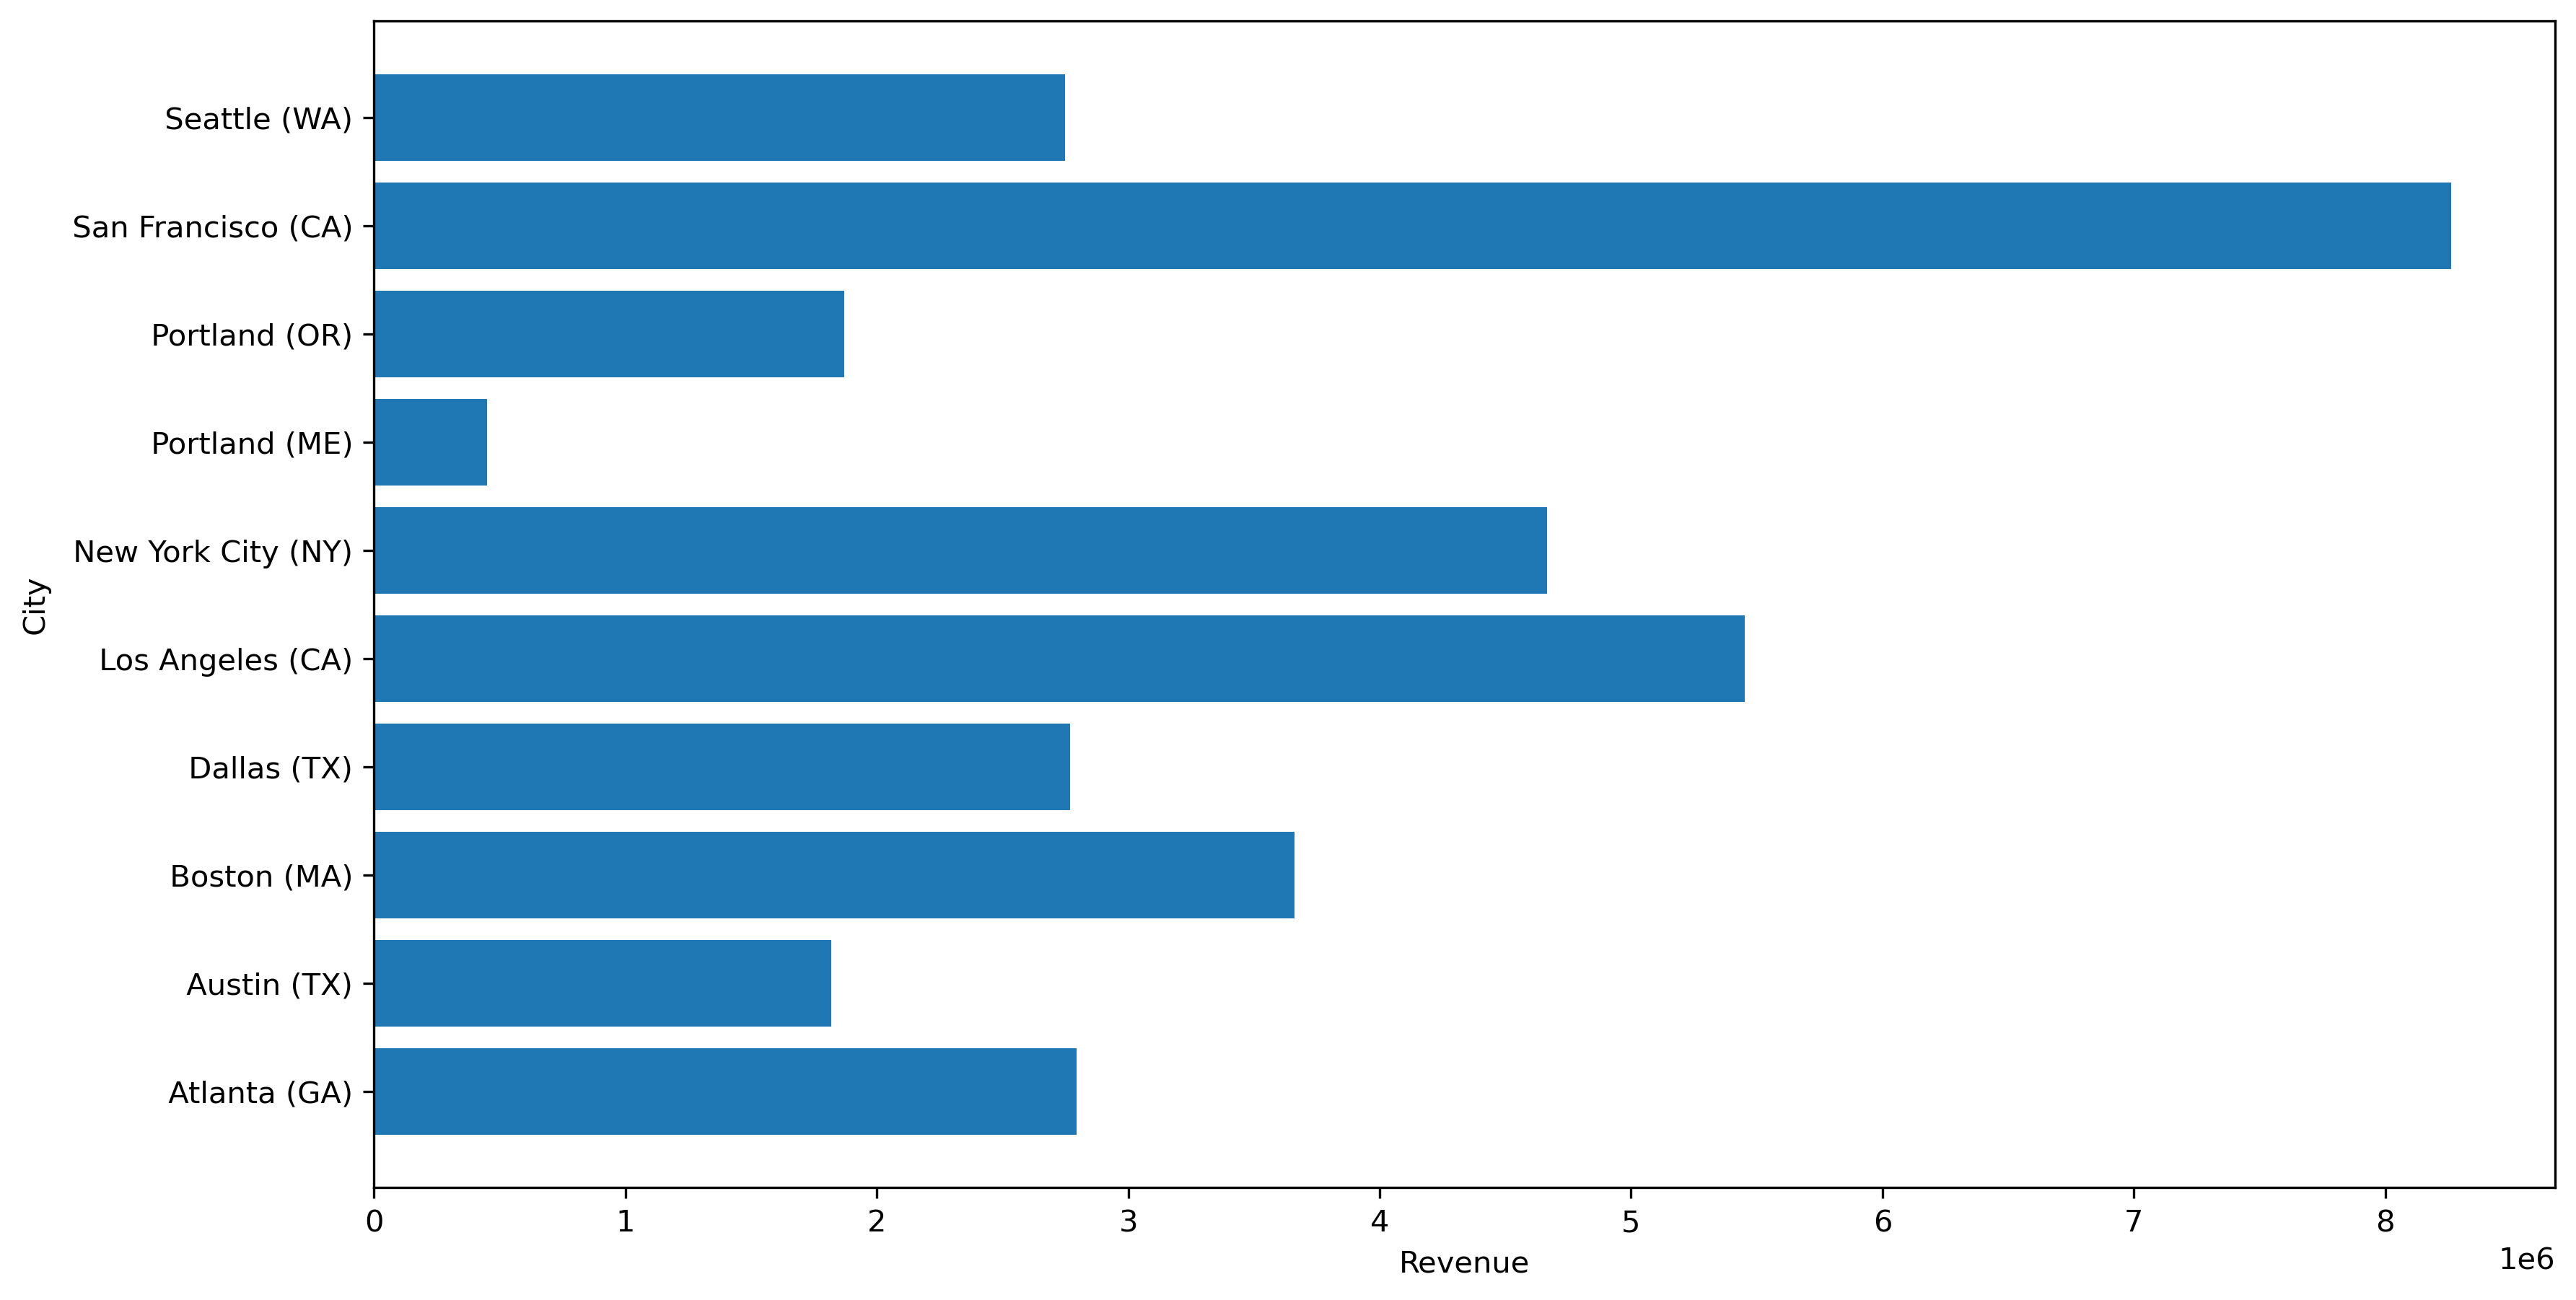

In [130]:
# cities = df["City"].unique()
# We cannot use unique here as the list of unique cities and groupped revenue by cities will have different order
# So we have to take list of unique cities from the groupby result
cities = [city for city, df in df.groupby("City")["Revenue"]]
result = df.groupby("City")["Revenue"].sum()

plt.figure(figsize=(13, 7), dpi=300)
plt.barh(cities, result)
plt.xlabel("Revenue")
plt.ylabel("City")
plt.show()

The chart shows us that San Francisco (CA) is the city with highest revenue in this year and the lowest is Portland (ME).</br>
The reasonable explanation for that is San Francisco (CA) is the city with highest population or income, followed by Los Angeles (CA) and New York (NY).<br>

## Golden time for sale
To effectively approach customers and increase revenue, one of the most important aspect is what time we should display advertisements to attract them.</br>
To perform this analysis, we need to use the column **"Order Date"** to get hour value and draw a chart.<br>

In [131]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour.astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12


In [132]:
df.groupby("Hour")["Revenue"].sum()

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Revenue, dtype: float64

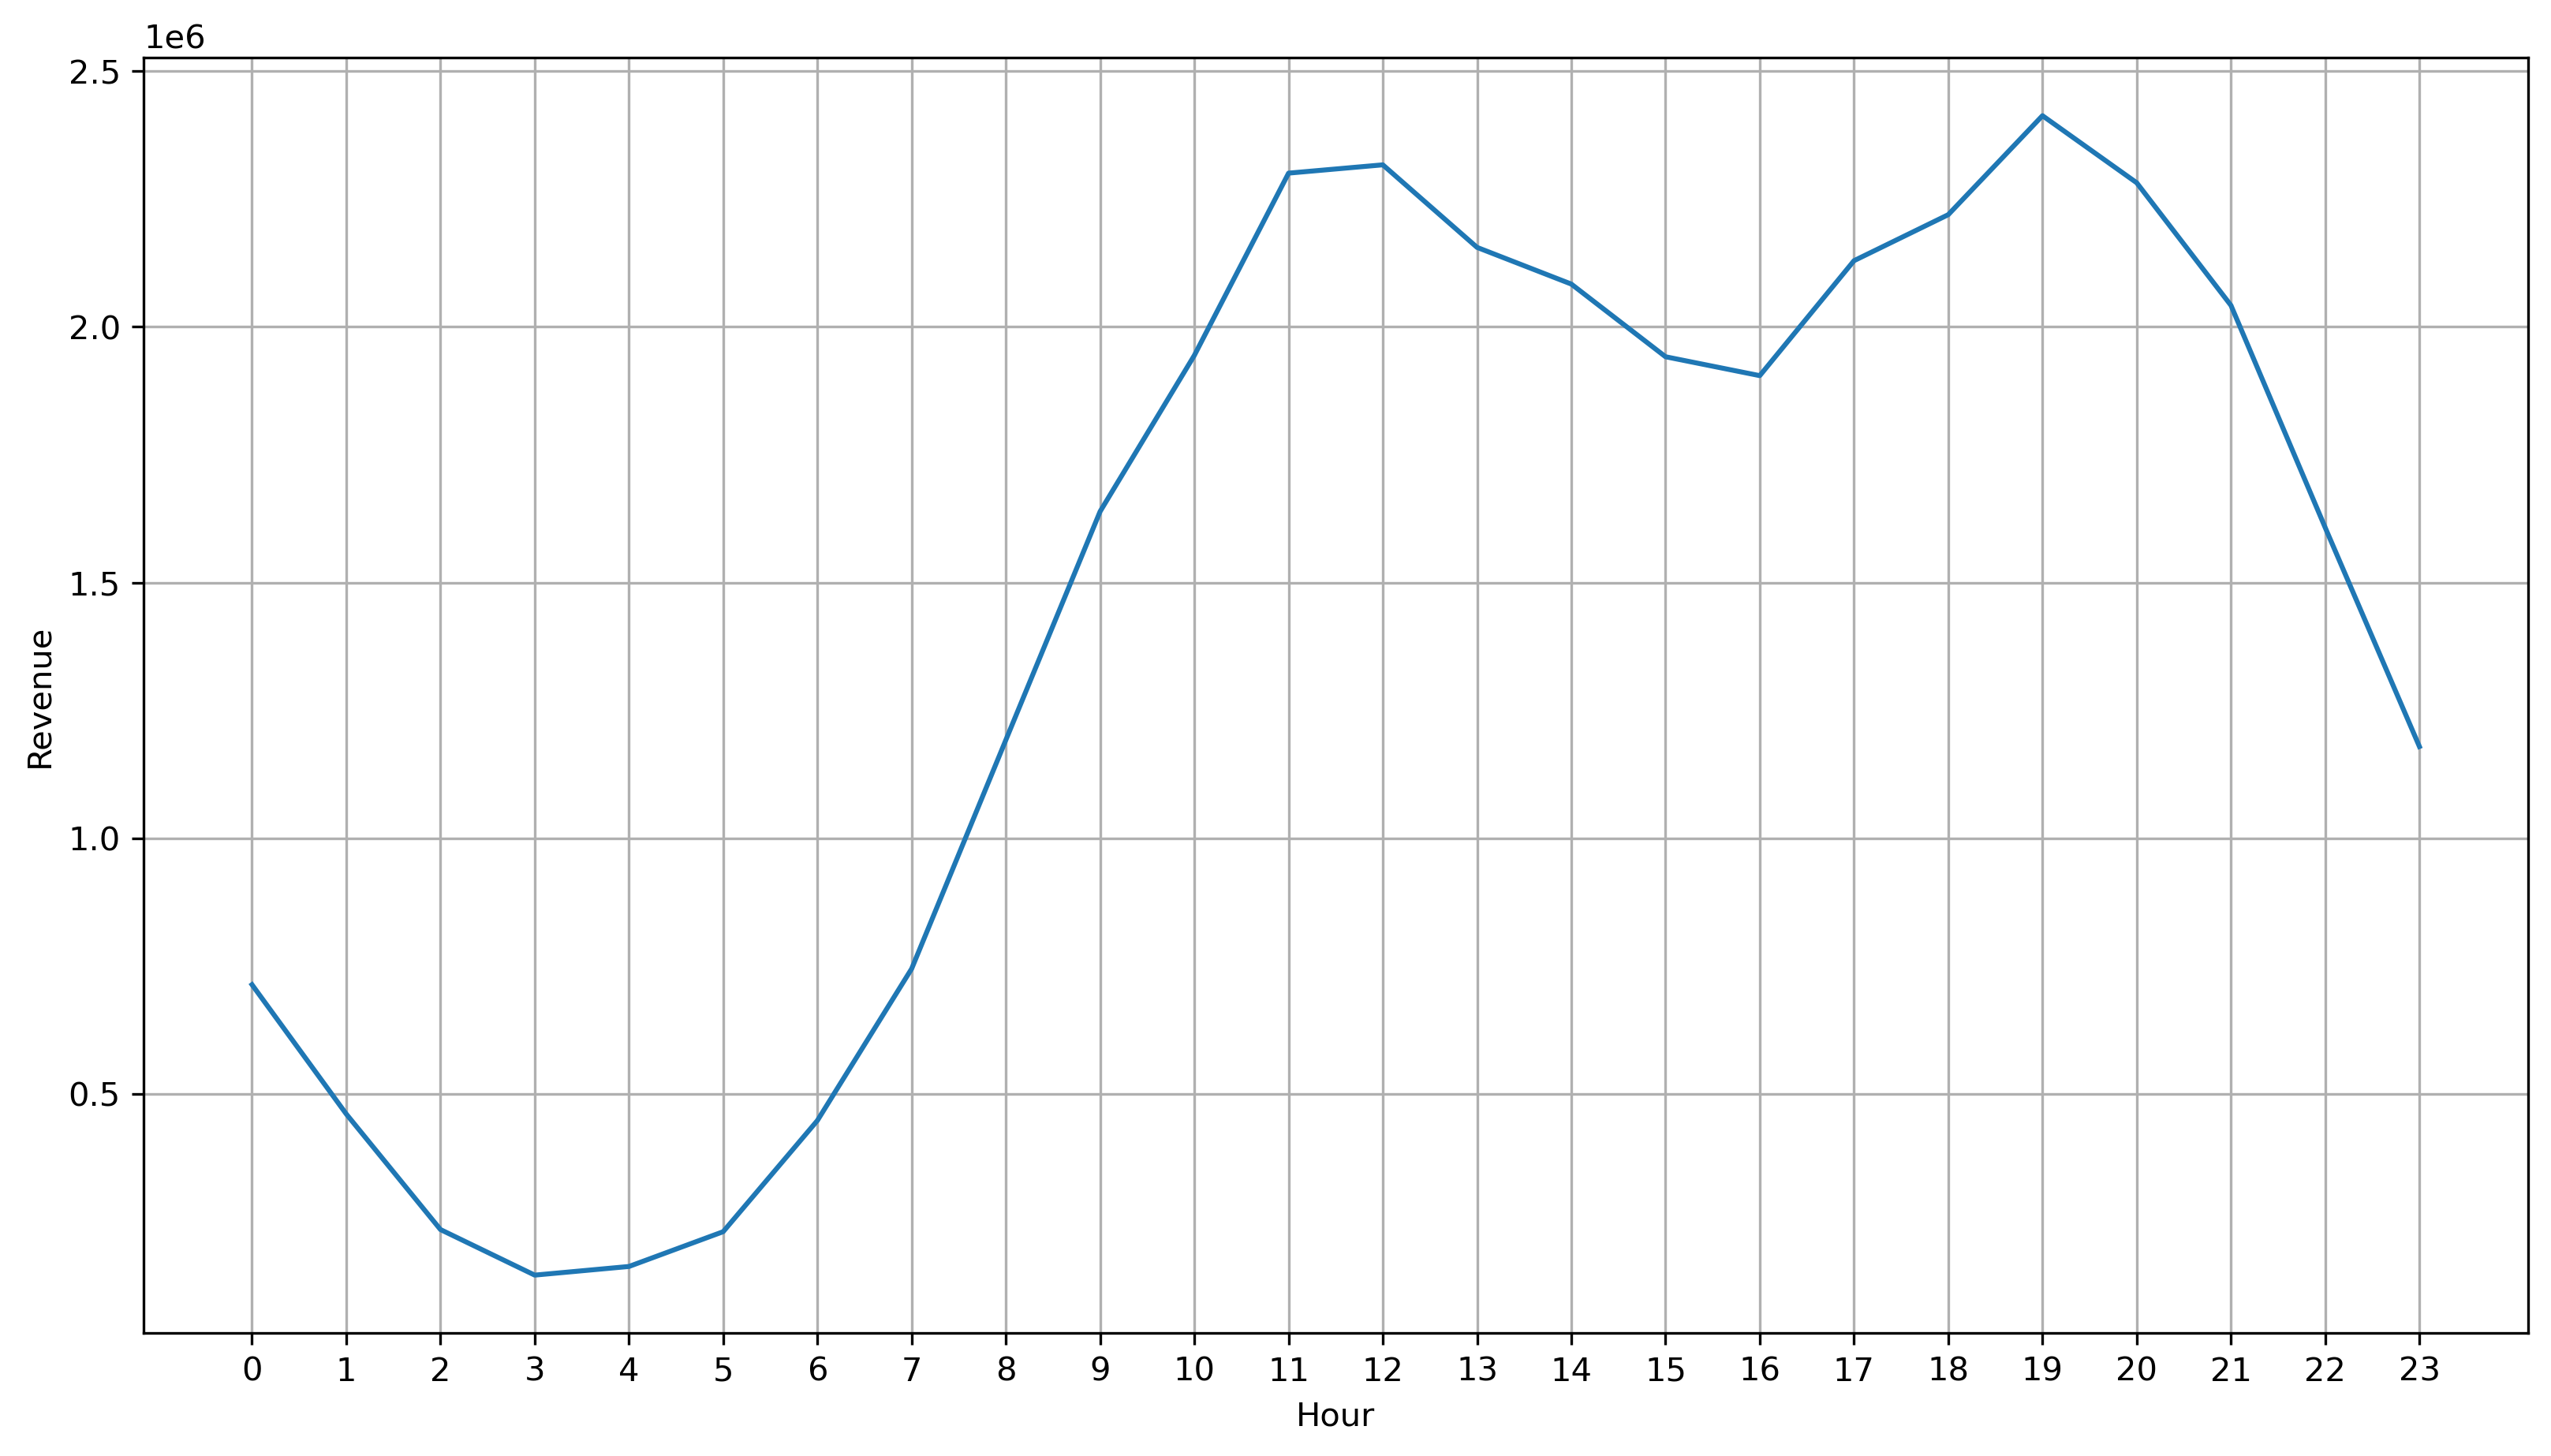

In [145]:
hour = range(0,24)
result = df.groupby("Hour")["Revenue"].sum()

plt.figure(figsize=(13, 7), dpi=300)
plt.plot(hour, result)
plt.xticks(hour)
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.grid()
plt.show()

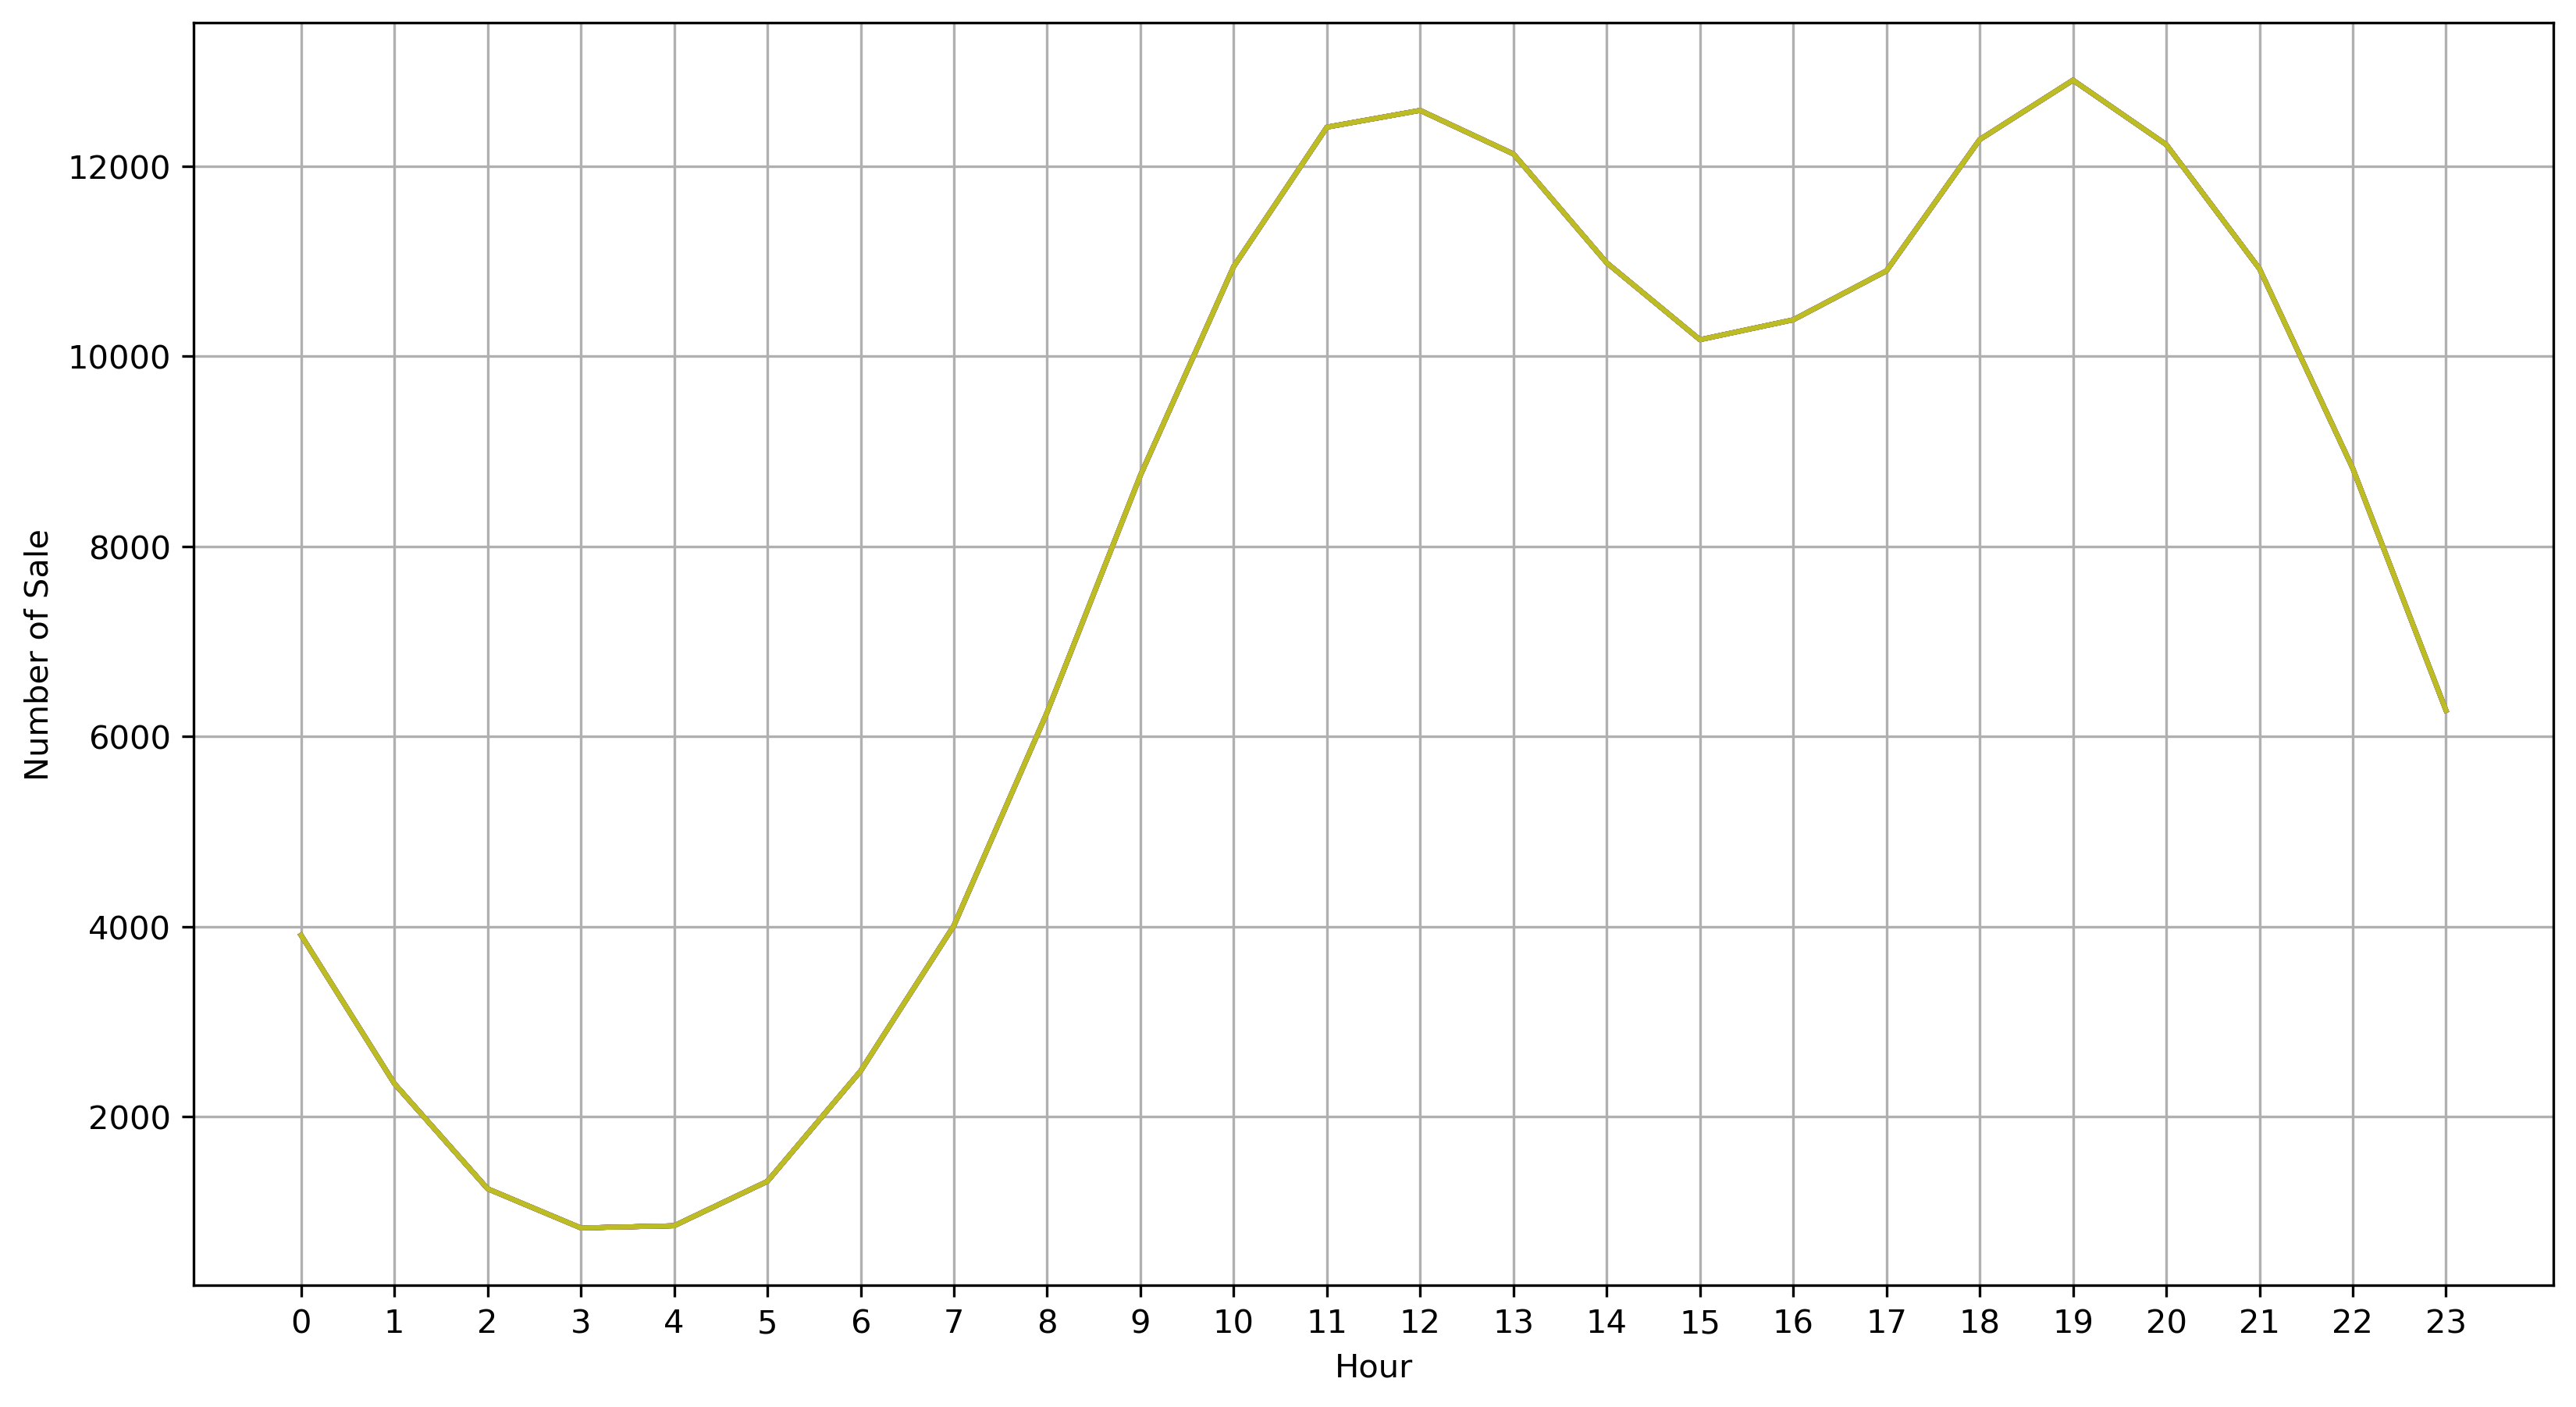

In [147]:
hour = range(0,24)
result = df.groupby("Hour").count()

plt.figure(figsize=(13, 7), dpi=300)
plt.plot(hour, result)
plt.xticks(hour)
plt.xlabel("Hour")
plt.ylabel("Number of Sale")
plt.grid()
plt.show()

The 2 charts above show us revenue and number of sale each hour, respectively.<br>
Both charts look not too much different, both explain that people tend to shopping at 11-12h AM and 7h PM because it is time for relax after work or starting doing household. So it should also be the time to display more advertisements.<br>
However, there are some cases those charts are different each other. Because people can shopping a lot of cheap goods, that lead to a high number of sale but it does not ensure the revenue could be high as well, vice versa.<br>

## Find out which products are sold together
The products are sold together will have the same Order ID (they also have same Purchase Address and Order Date).<br>

In [159]:
# set keep = False to return True for all duplicated ID
df[["Order ID","Order Date","Purchase Address"]].duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 185950, dtype: bool

In [161]:
df_dup = df[df[["Order ID","Order Date","Purchase Address"]].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14


In [162]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14649 entries, 16 to 186843
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          14649 non-null  object 
 1   Product           14649 non-null  object 
 2   Quantity Ordered  14649 non-null  int64  
 3   Price Each        14649 non-null  float64
 4   Order Date        14649 non-null  object 
 5   Purchase Address  14649 non-null  object 
 6   Month             14649 non-null  int32  
 7   Revenue           14649 non-null  float64
 8   City              14649 non-null  object 
 9   Hour              14649 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 1.1+ MB


Now we will create a new column with value is name of products are sold together.<br>

In [165]:
df_dup["Grouped"] = df_dup.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))

/var/folders/5x/p6541ly17_s6v09tppcsph4c0000gn/T/ipykernel_28997/3984115306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup["Grouped"] = df_dup.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


In [166]:
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour,Grouped
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,"Vareebadd Phone,USB-C Charging Cable"


In [168]:
df_dup = df_dup[["Order ID","Grouped"]].drop_duplicates()
df_dup.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


We have a new DataFrame with only Order ID and group of products are sold together.<br>
But we can not use aggreagation functions here because it is still not clear.<br>
Ex:<br>
Order 1: A, B, C<br>
Order 2: B, C, D<br>
<br>
If we use group by here, it will return:<br>
A,B,C : 1<br>
B,C,D : 1<br>
<br>
While thing we need is to explore them in detail<br>
A,B : 1<br>
B,C : 2<br>
C,D : 1<br>

In [170]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_dup["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [172]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

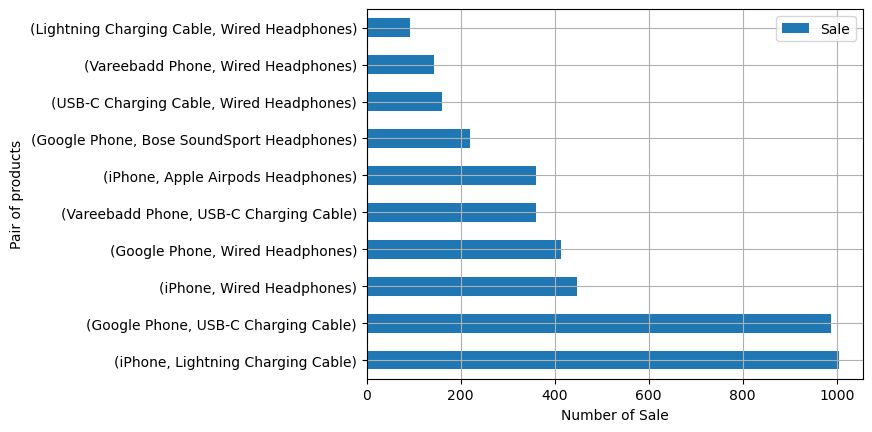

In [220]:
result = pd.DataFrame(count.most_common(10))
result.columns = ["Products","Sale"]

result.plot.barh(x="Products", y="Sale")
plt.xlabel("Number of Sale")
plt.ylabel("Pair of products")
plt.grid()
plt.show()

With that result we can see top 10 (or more) pair of products are sold together.<br>
This analysis show us the consumer behavior of people, therefore, we can base on that to build a Recommendation System to increase sale.<br>

## Product was sold the most

In [221]:
df.groupby("Product")["Quantity Ordered"].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

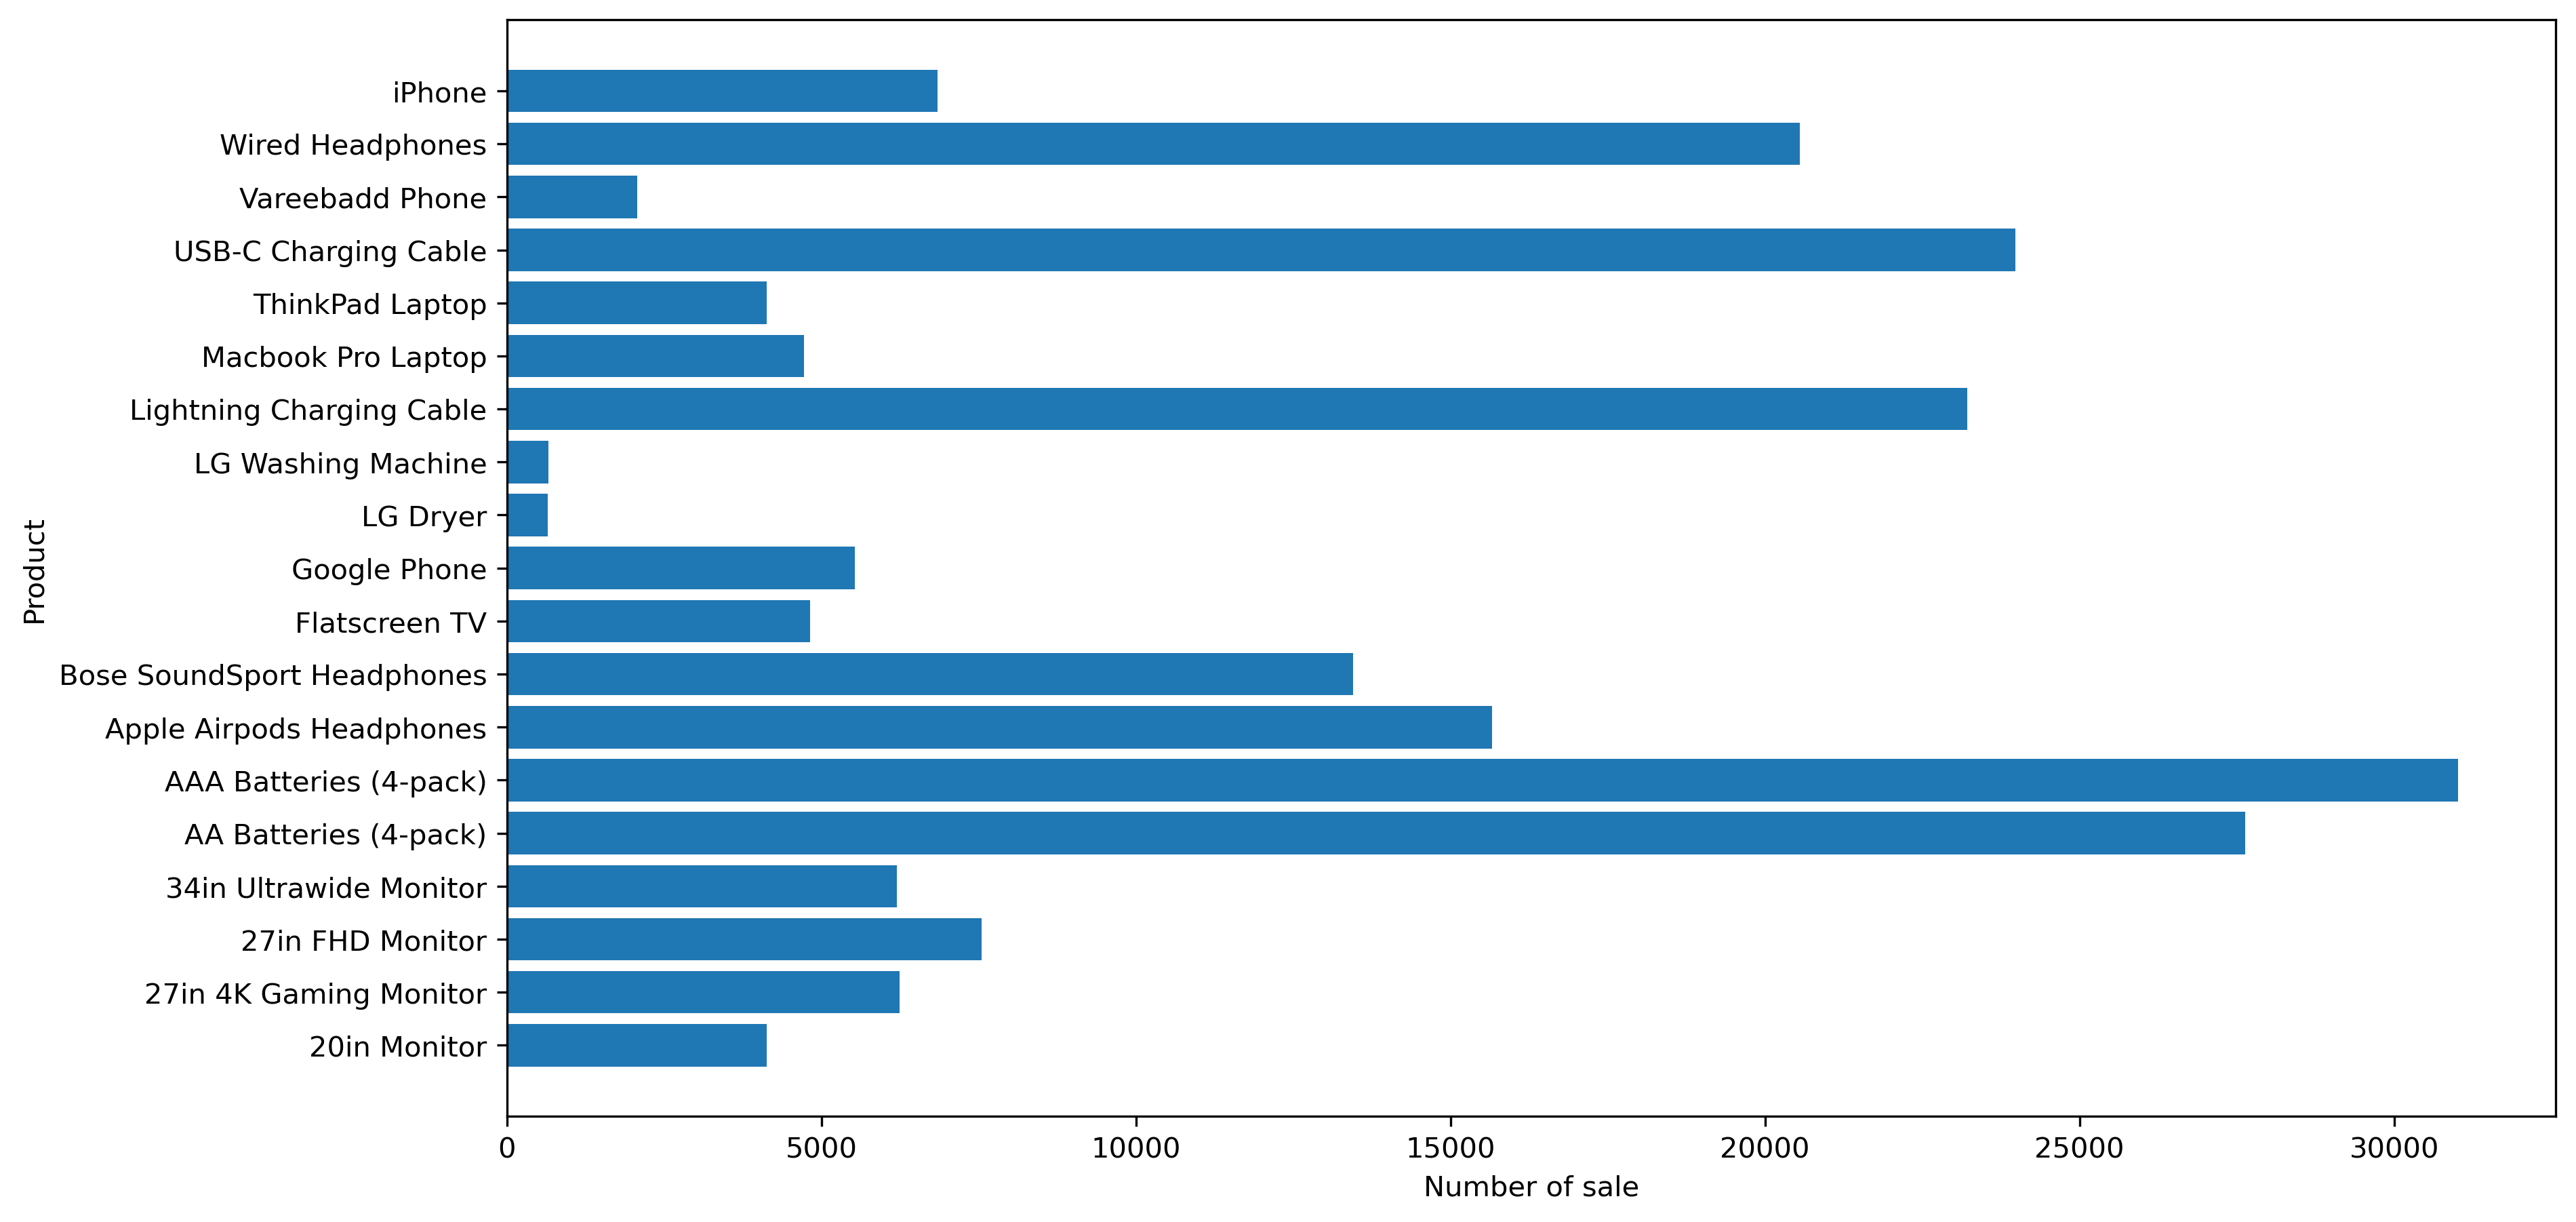

In [222]:
products = [product for product, df in df.groupby("Product")["Quantity Ordered"]]
result = df.groupby("Product")["Quantity Ordered"].sum()

plt.figure(figsize=(13, 7), dpi=300)
plt.barh(products, result)
plt.xlabel("Number of sale")
plt.ylabel("Product")
plt.show()

We can see that top 5 products was sold the most are AAA Batteries, AA Batteries, USB-C Charging cable, Lightning charging cable and Wired headphones.<br>
It is just a simple analysis but to understand why those products were sold the most, we need to dive deeper in other aspect. Let see how the price affect on the number of sale.<br>

In [224]:
# We use mean function here as a product could be sold with different prices in other stores
df.groupby("Product")["Price Each"].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/var/folders/5x/p6541ly17_s6v09tppcsph4c0000gn/T/ipykernel_28997/2294175994.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=9)


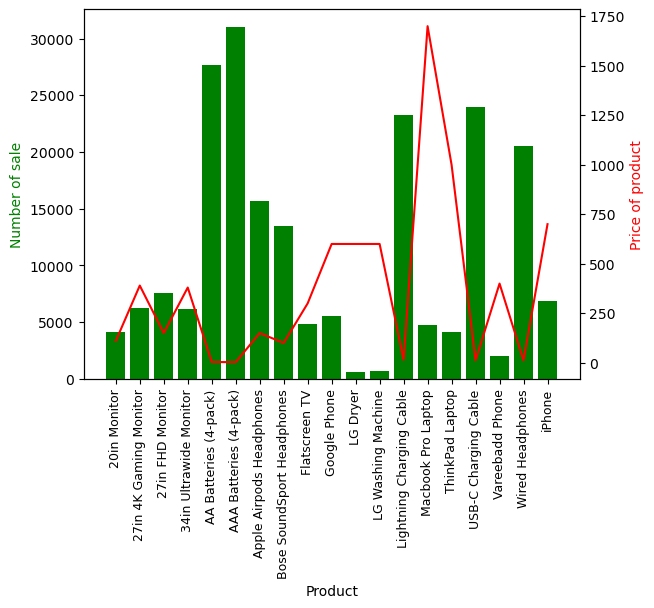

In [246]:
products = [product for product, df in df.groupby("Product")["Quantity Ordered"]]
res_order = df.groupby("Product")["Quantity Ordered"].sum()
res_price = df.groupby("Product")["Price Each"].mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, res_order, color='g')
ax2.plot(products, res_price, color='r')

ax1.set_xlabel('Product')
ax1.set_xticklabels(products, rotation='vertical', size=9)
ax1.set_ylabel('Number of sale', color='g')
ax2.set_ylabel('Price of product', color='r')

plt.show()

/var/folders/5x/p6541ly17_s6v09tppcsph4c0000gn/T/ipykernel_28997/1796942169.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=9)


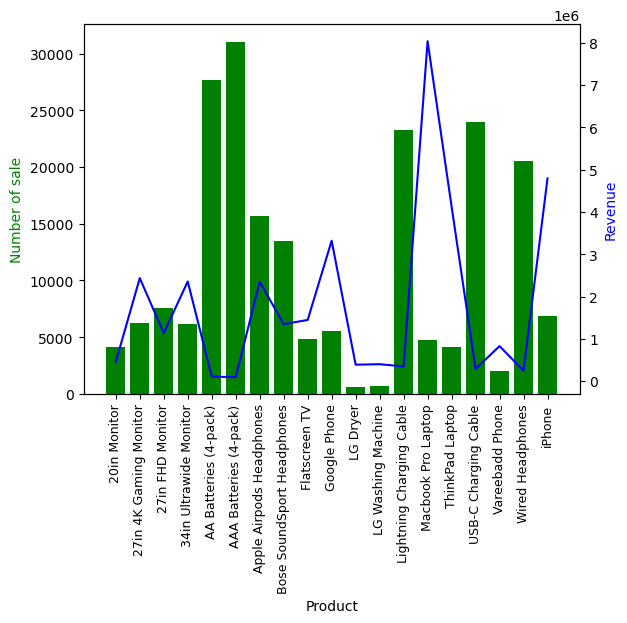

In [247]:
products = [product for product, df in df.groupby("Product")["Quantity Ordered"]]
res_order = df.groupby("Product")["Quantity Ordered"].sum()
res_revenue = df.groupby("Product")["Revenue"].sum()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, res_order, color='g')
ax2.plot(products, res_revenue, color='b')

ax1.set_xlabel('Product')
ax1.set_xticklabels(products, rotation='vertical', size=9)
ax1.set_ylabel('Number of sale', color='g')
ax2.set_ylabel('Revenue', color='b')

plt.show()

Now it is clear that the top 5 best selling products have very low price, while the others which is expensive do not have selling well. Therefore, we can more understand well shopping trends of people, they easily spend money to buy a cheap product. (Chart 1)<br>
<br>
However, planning a sale strategy depends on revenue as well. Although people tends to buy the top 5 best selling products, their revenue they brought is very low. While Macbook laptop has a low number of sale but its revenue is the highest, followed by iPhone. It depends on the purpose of the business we can plan a suitable strategy to bring the most benefit. (Chart 2)<br>